In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#PULIZIA DEL DATASET

df = pd.read_csv(r'DATASET_USA\archive\US_Accidents_March23.csv')
#df = pd.read_csv('US_Accidents_March23_sampled_500k.csv')

#pulizia colonne temporali: taglio fino ai secondi e conversione in datetime
df['Start_Time'] = df['Start_Time'].str.slice(0, 19)
df['End_Time'] = df['End_Time'].str.slice(0, 19)
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

#estrazione ora e anno
df['Hour'] = df['Start_Time'].dt.hour
df['Year'] = df['Start_Time'].dt.year

#rimuovo anni incompleti: 2016 e 2023
df = df[(df['Year'] != 2016) & (df['Year'] != 2023)]
#conversione distanza da miglia a chilometri
df['Distance_km'] = df['Distance(mi)'] * 1.60934

#calcolo della durata in ore
df['Duration_hr'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600

#conversione temperatura e wind chill in gradi celsisus
df['Temperature(C)'] = (df['Temperature(F)'] - 32) * 5 / 9
df['Wind_Chill(C)'] = (df['Wind_Chill(F)'] - 32) * 5 / 9

#velocità vento da mph a km/h
df['Wind_Speed(km/h)'] = df['Wind_Speed(mph)'] * 1.60934
#visibilità da miglia a km
df['Visibility(km)'] = df['Visibility(mi)'] * 1.60934

#considero solo i dati sensati
df.loc[df['Pressure(in)'] <= 0, 'Pressure(in)'] = np.nan
df.loc[df['Duration_hr'] <= 0, 'Duration_hr'] = np.nan
df.loc[df['Humidity(%)'] < 0, 'Humidity(%)'] = np.nan
df.loc[df['Wind_Speed(km/h)'] < 0, 'Wind_Speed(km/h)'] = np.nan
df.loc[df['Visibility(km)'] < 0, 'Visibility(km)'] = np.nan
df.loc[df['Distance_km'] < 0, 'Distance_km'] = np.nan

In [1]:
%%HTML
<style>
  .reveal h3 {
    text-align: center;
    color: #264d73;
    margin-bottom: 0.5em;
  }
  .reveal h3 span {
      font-size: 0.8em;
      font-weight: normal;
      display: block;
      margin-top: 0.2em;
    }

  .reveal h4 {
    color: #5f7db1;
    margin-top: 1.2em;
    margin-bottom: 0.5em;
  }

  .reveal ul li,
  .reveal ol li {
    font-size: 0.85em;
    margin-bottom: 0.4em;
    line-height: 1.4em;
  }

  .reveal ul li a,
  .reveal ol li a {
    color: #3B5C73;
    text-decoration: underline;
  }

  .reveal ul,
  .reveal ol {
    margin-left: 20px;
    margin-bottom: 1em;
  }

  .reveal .content-block {
    margin-bottom: 40px;
  }

</style>

<h3>
  ANALISI DEL DATASET SUGLI INCIDENTI STRADALI NEGLI USA<br>
  <span>(2017–2022)</span>
</h3><br>

<section class="content-block">
  <h4>Motivazioni della scelta del progetto</h4>
  <ul>
    <li>Essendo un neopatentato, mi sento direttamente coinvolto nel tema della sicurezza stradale.</li>
    <li>Ogni giorno si verificano gravi incidenti stradali, il che rende questo tema attuale e rilevante.</li>
    <li>Interesse nel capire come i dati reali possano darci delle risposte concrete a domande legate alla sicurezza stradale.</li>
  </ul>
</section>

<section class="content-block">
  <h4>Domande principali</h4>
  <ol>
    <li>Quando avvengono maggiormente gli incidenti?</li>
    <li>Le condizioni meteorologiche influenzano la gravità degli incidenti?</li>
    <li>La presenza di determinati elementi stradali incide sulla gravità degli incidenti?</li>
    <li>Sono presenti altre variabili che influenzano la gravità degli incidenti o che sono influenzate da essa?</li>
  </ol>
</section>

In [5]:
%%HTML
<h3 style="text-align: left;">Descrizione del Dataset</h3>

<ul>
  <li>
    Il dataset è stato creato da <strong>Sobhan Moosavi</strong> e si trova sulla piattaforma Kaggle al seguente link: 
    <a href="https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents" target="_blank">US Accidents - Kaggle</a>.
  </li>
  <li>Contiene circa 7,7 milioni di record di incidenti stradali verificatisi in 49 stati degli Stati Uniti dal 2016 al 2023.</li>
  <li>Ogni incidente è dettagliato con informazioni quali data, ora, posizione geografica, condizioni meteo, durata e altri elementi stradali rilevanti.</li>
  <li>Ogni incidente è classificato secondo un livello di gravità da 1 a 4.</li>
</ul><br>

<div>
  <h4>Fonti dei dati del dataset</h4>
  <ul>
    <li>Dipartimenti dei Trasporti Federali e Statali</li>
    <li>Forze dell’Ordine</li>
    <li>Telecamere del Traffico</li>
    <li>Sensori Stradali</li>
  </ul>
</div>

In [9]:
%%HTML
<h3>Quando avvengono maggiormente gli incidenti? </h3>
<h4>1) Trend numerico degli incidenti stradali negli anni</h4>

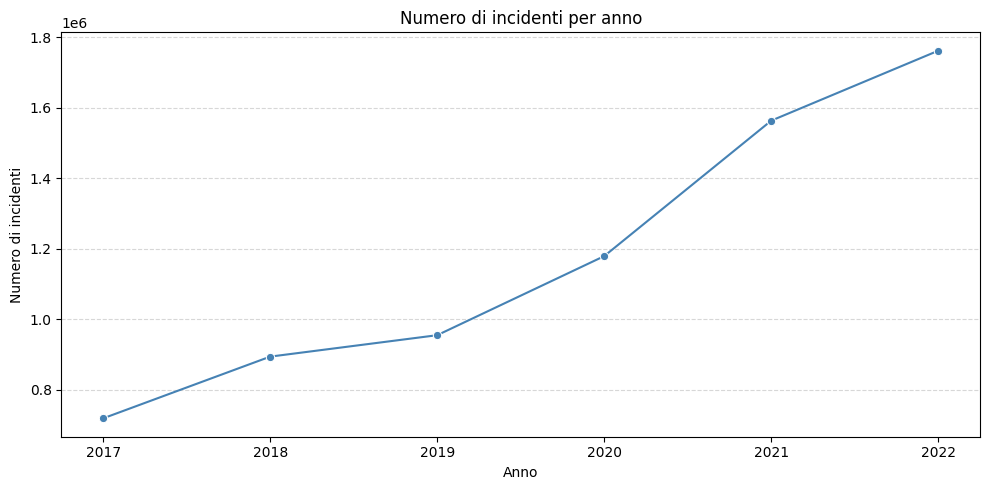

In [3]:
#ANALISI TEMPORALE
#Trend incidenti per anno

incidenti_annuali = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=incidenti_annuali.index, y=incidenti_annuali.values, marker='o', color='steelblue')

plt.title('Numero di incidenti per anno')
plt.xlabel('Anno')
plt.ylabel('Numero di incidenti')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [58]:
%%HTML
<h4>2) Numero di incidenti per mese dell'anno con andamento temperatura media mensile </h4>

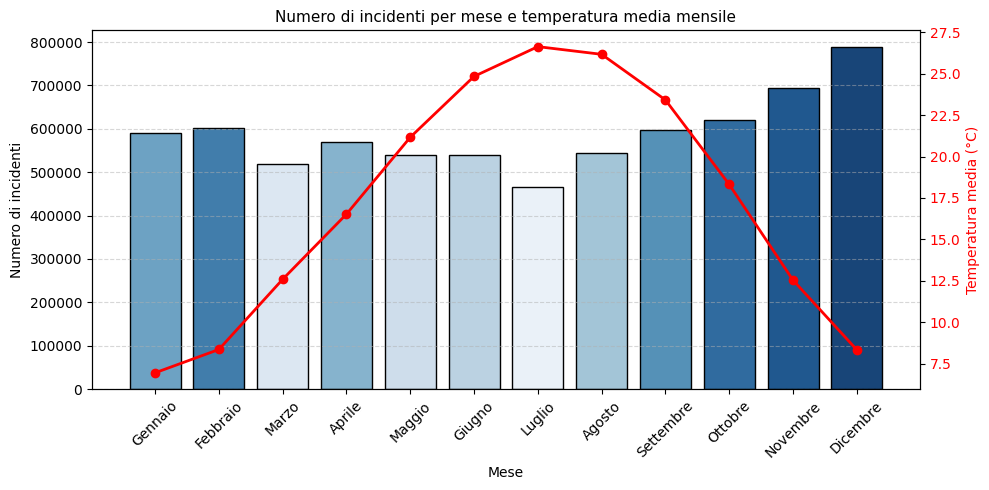

In [5]:
mesiAnno = ['January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December']

mesiAnno_ita = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno',
                'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']

df['Month_Of_Year'] = df['Start_Time'].dt.month_name()
incidenti_mensili = df['Month_Of_Year'].value_counts().reindex(mesiAnno)

pb3 = sns.color_palette("Blues", n_colors=len(incidenti_mensili))

fig, ax1 = plt.subplots(figsize=(10, 5))

sns.barplot(x=incidenti_mensili.index, y=incidenti_mensili.values, hue=incidenti_mensili.values, palette=pb3, ax=ax1, edgecolor='black')

ax1.set_title('Numero di incidenti per mese e temperatura media mensile', fontsize=11)
ax1.set_xlabel('Mese')
ax1.set_ylabel('Numero di incidenti')

ax1.set_xticks(range(len(mesiAnno_ita)))
ax1.set_xticklabels(mesiAnno_ita, rotation=45)

ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.get_legend().remove()

temp_media_mensile = df.groupby('Month_Of_Year')['Temperature(C)'].mean().reindex(mesiAnno)

ax2 = ax1.twinx()
ax2.plot(temp_media_mensile.index, temp_media_mensile.values, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Temperatura media (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

In [57]:
%%HTML
<h4>3) Numero di incidenti per giorno della settimana</h4>

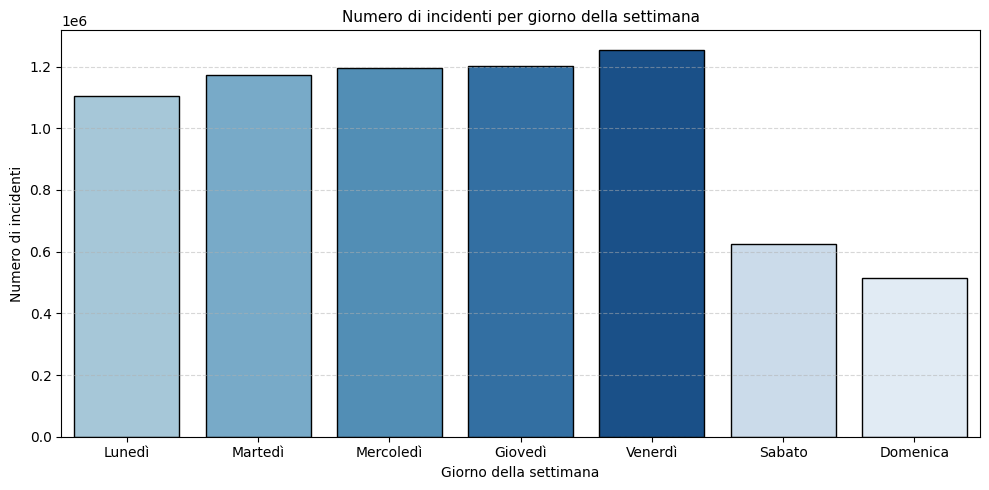

In [4]:
#Incidenti per giorno della settimana
giorni_settimana_ita = ['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica']

df['Day_of_Week'] = df['Start_Time'].dt.day_name()  #restituisce i nomi dei giorni
incidenti_giornalieri = df['Day_of_Week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

pb2 = sns.color_palette("Blues", n_colors=len(incidenti_giornalieri))

plt.figure(figsize=(10,5))
sns.barplot(x=incidenti_giornalieri.index, y=incidenti_giornalieri.values, hue=incidenti_giornalieri.values, palette=pb2, edgecolor='black')
plt.title('Numero di incidenti per giorno della settimana', fontsize=11)
plt.xlabel('Giorno della settimana')
plt.xticks(ticks=range(len(giorni_settimana_ita)), labels=giorni_settimana_ita)
plt.ylabel('Numero di incidenti')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend([],[], frameon=False)
plt.show()

In [56]:
%%HTML
<h4>4) Numero di incidenti per ora del giorno</h4>

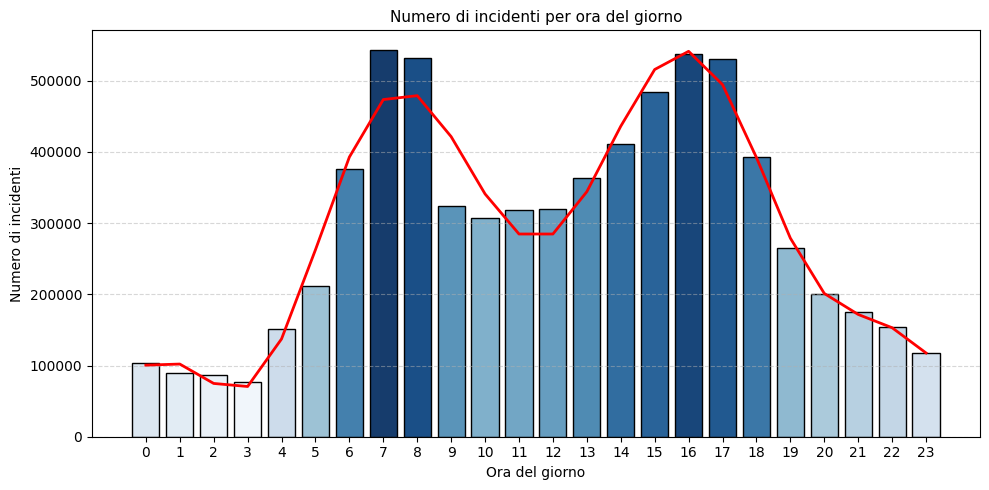

In [6]:

#Incidenti per ora del giorno
df['Hour_of_Day'] = df['Start_Time'].dt.hour

incidenti_orari = df['Hour_of_Day'].value_counts().sort_index()  # ordina per ora

pb = sns.color_palette("Blues", n_colors=len(incidenti_orari))


coeffs = np.polyfit(incidenti_orari.index, incidenti_orari.values, deg=10)
line_y = np.polyval(coeffs, incidenti_orari.index)

plt.figure(figsize=(10, 5))
sns.barplot(x=incidenti_orari.index, y=incidenti_orari.values, hue=incidenti_orari.values, palette=pb, edgecolor='black')
plt.plot(incidenti_orari.index, line_y, color='red', linewidth=2, label='Linea di tendenza')
plt.title('Numero di incidenti per ora del giorno', fontsize=11)
plt.xlabel('Ora del giorno')
plt.ylabel('Numero di incidenti')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

In [55]:
%%HTML
<h4>5) Distribuzione percentuale della gravità per ogni ora del giorno</h4>

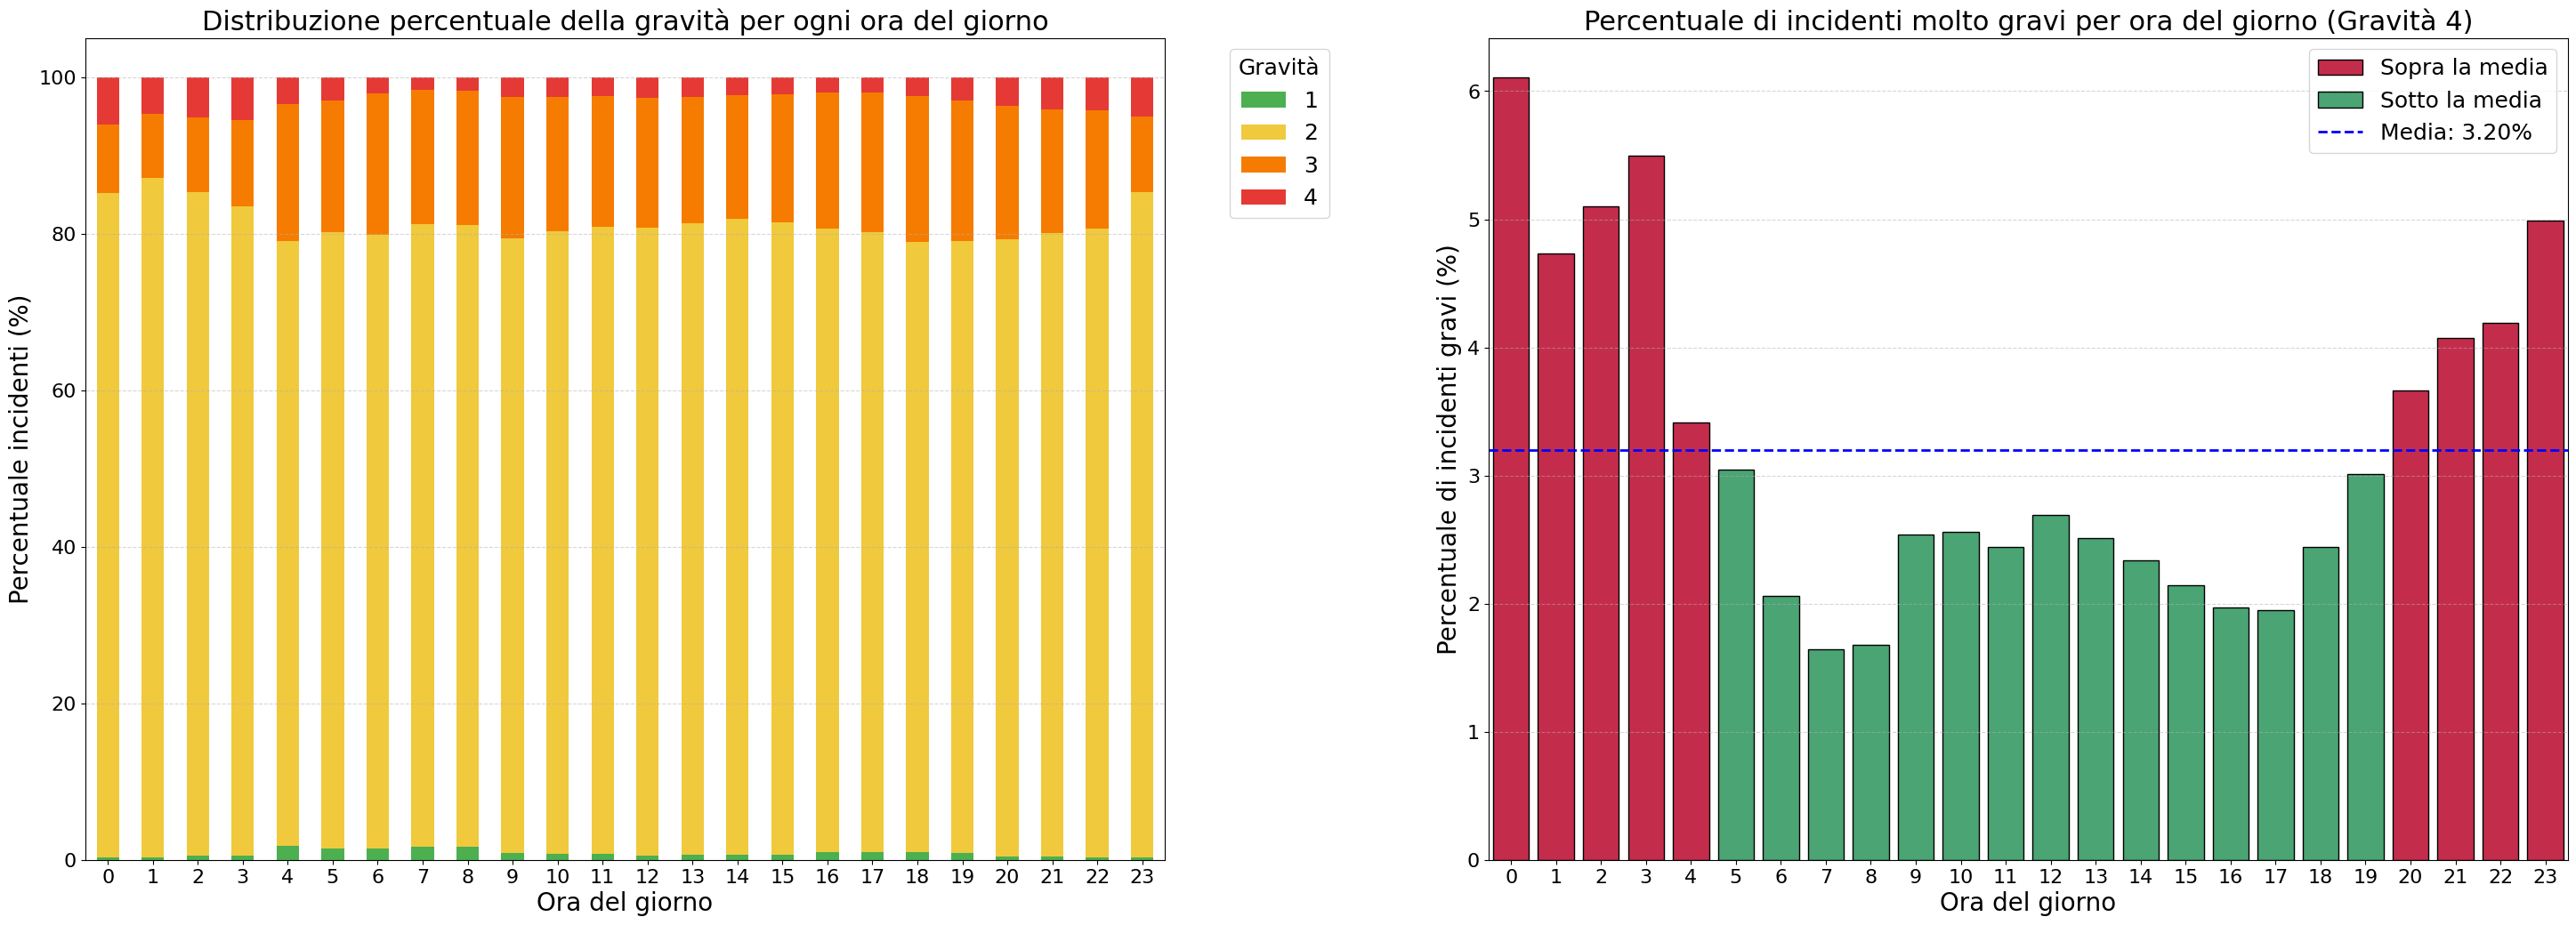

In [4]:

plt.rcParams.update({
    'font.size': 18,
    'axes.titlesize': 22,
    'axes.labelsize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(36, 12), gridspec_kw={'wspace': 0.3})


counts = df.groupby(['Hour', 'Severity']).size().reset_index(name='Count')
totals = counts.groupby('Hour')['Count'].transform('sum')
counts['Percentage'] = counts['Count'] / totals * 100
pivot_df = counts.pivot(index='Hour', columns='Severity', values='Percentage').fillna(0)
pivot_df = pivot_df[[1, 2, 3, 4]]
colors = ['#4CAF50', '#F0C93D', '#F57C00', '#E53935']
pivot_df.plot(kind='bar', stacked=True, ax=ax1, color=colors)

ax1.set_title('Distribuzione percentuale della gravità per ogni ora del giorno')
ax1.set_xlabel('Ora del giorno')
ax1.set_ylabel('Percentuale incidenti (%)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.legend(title='Gravità', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.5)


df_gravi = df[df['Severity'] == 4]
cont = df_gravi.groupby(['Hour', 'Severity']).size().reset_index(name='Count')
tot = df.groupby('Hour').size()
cont['Total_per_Hour'] = cont['Hour'].map(tot)
cont['Percentage'] = cont['Count'] / cont['Total_per_Hour'] * 100
media_percentuale = cont['Percentage'].mean()
cont['Categoria'] = cont['Percentage'].apply(lambda x: 'Sopra la media' if x > media_percentuale else 'Sotto la media')

sns.barplot(data=cont, x='Hour', y='Percentage', hue='Categoria', dodge=False,
            palette={'Sopra la media': 'crimson', 'Sotto la media': 'mediumseagreen'},
            edgecolor='black', ax=ax2)

ax2.axhline(media_percentuale, color='blue', linestyle='--', linewidth=2, label=f'Media: {media_percentuale:.2f}%')
ax2.set_title('Percentuale di incidenti molto gravi per ora del giorno (Gravità 4)')
ax2.set_xlabel('Ora del giorno')
ax2.set_ylabel('Percentuale di incidenti gravi (%)')
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.legend(loc='upper right')
plt.show()

In [13]:
%%HTML
<h3>Le condizioni meteorologiche influenzano la gravità degli incidenti?</h3>
<h4>Condizioni meteo più frequenti e condizioni meteo con gravità media più alta</h4>

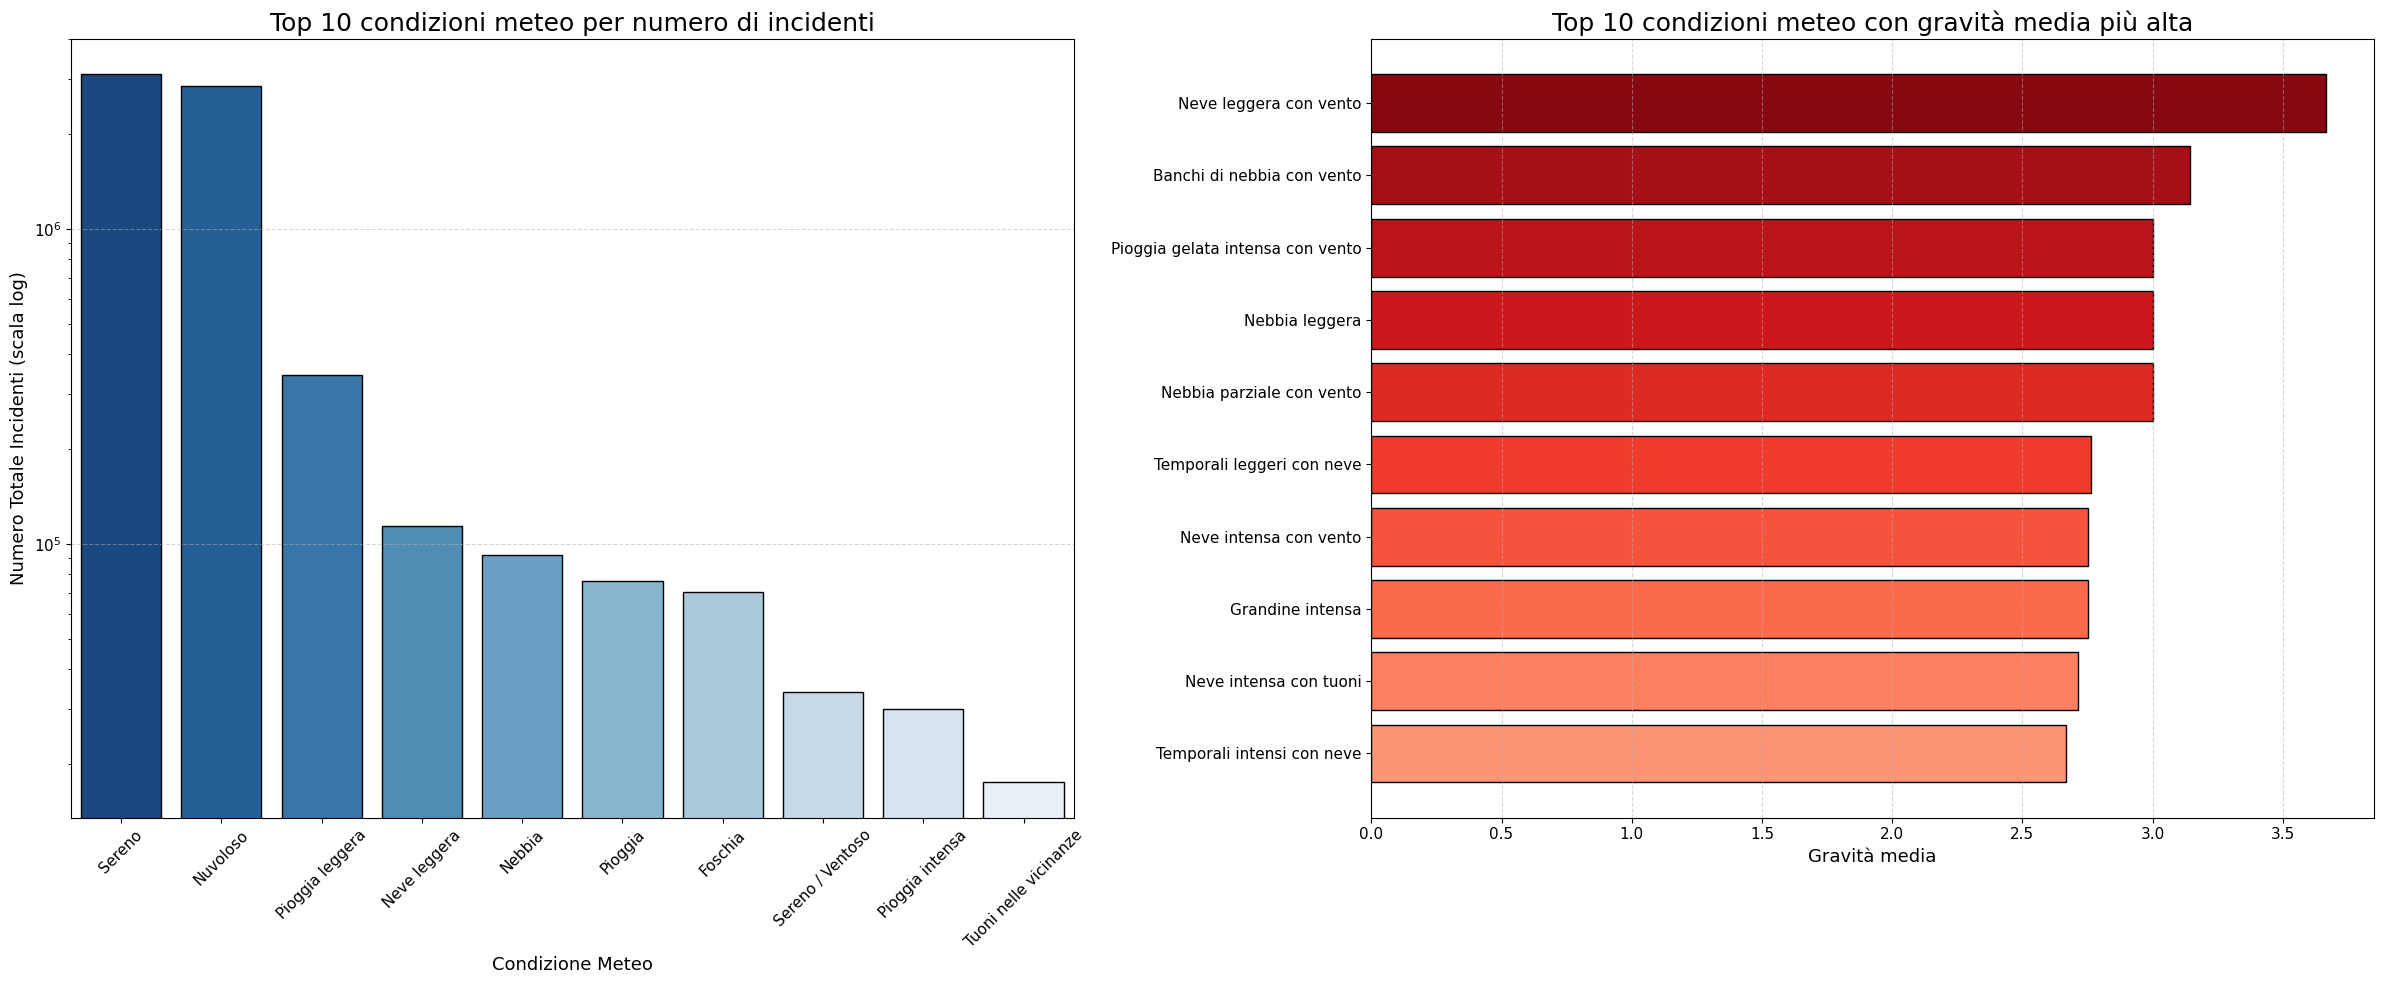

In [5]:
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 18,
    'axes.labelsize': 13,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 12
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

df['Weather_Condition'] = df['Weather_Condition'].replace({
    'Overcast': 'Cloudy',
    'Mostly Cloudy': 'Cloudy',
    'Partly Cloudy': 'Cloudy',
    'Scattered Clouds': 'Cloudy',
    'Clear': 'Fair',
    'Light Drizzle': 'Light Rain'
})

traduzioni_meteo = {
    'Fair': 'Sereno',
    'Cloudy': 'Nuvoloso',
    'Light Rain': 'Pioggia leggera',
    'Light Snow': 'Neve leggera',
    'Fog': 'Nebbia',
    'Rain': 'Pioggia',
    'Haze': 'Foschia',
    'Fair / Windy': 'Sereno / Ventoso',
    'Heavy Rain': 'Pioggia intensa',
    'Thunder in the Vicinity': 'Tuoni nelle vicinanze'
}

top_10_weather = df['Weather_Condition'].value_counts().head(10).reset_index()
top_10_weather.columns = ['Weather_Condition', 'Count']
top_10_weather['Weather_Condition'] = top_10_weather['Weather_Condition'].map(traduzioni_meteo).fillna(top_10_weather['Weather_Condition'])

sns.barplot(x='Weather_Condition', y='Count', data=top_10_weather, hue='Weather_Condition',
            palette='Blues_r', edgecolor='black', ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Top 10 condizioni meteo per numero di incidenti')
ax1.set_xlabel('Condizione Meteo')
ax1.set_ylabel('Numero Totale Incidenti (scala log)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.5)
if ax1.get_legend() is not None:
    ax1.get_legend().remove()

avg_severity = df.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False)
top_10_severity = avg_severity.head(10)

traduzioni_meteo_severity = {
    'Light Blowing Snow': 'Neve leggera con vento',
    'Patches of Fog / Windy': 'Banchi di nebbia con vento',
    'Heavy Freezing Rain / Windy': 'Pioggia gelata intensa con vento',
    'Light Fog': 'Nebbia leggera',
    'Partial Fog / Windy': 'Nebbia parziale con vento',
    'Light Thunderstorms and Snow': 'Temporali leggeri con neve',
    'Heavy Blowing Snow': 'Neve intensa con vento',
    'Heavy Ice Pellets': 'Grandine intensa',
    'Heavy Snow with Thunder': 'Neve intensa con tuoni',
    'Heavy Thunderstorms and Snow': 'Temporali intensi con neve'
}

idx = top_10_severity.index.to_series()
top_10_severity.index = idx.map(traduzioni_meteo_severity).fillna(idx).tolist()

palette = sns.color_palette('Reds_r', n_colors=15)
ax2.barh(top_10_severity.index, top_10_severity.values, color=palette, edgecolor='black')
ax2.set_title('Top 10 condizioni meteo con gravità media più alta')
ax2.set_xlabel('Gravità media')
ax2.invert_yaxis()
ax2.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [54]:
%%HTML
<h3>La presenza di determinati elementi stradali incide sulla gravità degli incidenti?</h3>
<h4>1) Gravità media in presenza o meno di elementi stradali</h4>

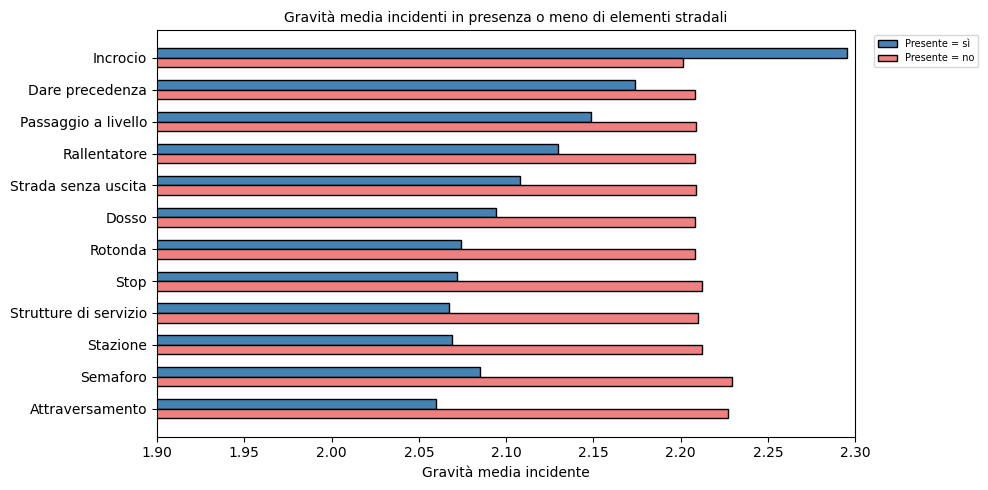

In [7]:
road_elem_trad = {
    'Roundabout': 'Rotonda', 'Traffic_Signal': 'Semaforo', 'Stop': 'Stop',
    'Crossing': 'Attraversamento', 'Give_Way': 'Dare precedenza', 'Junction': 'Incrocio',
    'Traffic_Calming': 'Rallentatore', 'No_Exit': 'Strada senza uscita',
    'Railway': 'Passaggio a livello', 'Amenity': 'Strutture di servizio',
    'Bump': 'Dosso', 'Station': 'Stazione'
}

bool_cols = df.select_dtypes('bool').columns.difference(['Severe', 'Turning_Loop', 'Temp_below_0', 'Temp_sotto_0'])

severity = pd.DataFrame({
    'True': [df[df[col]]['Severity'].mean() for col in bool_cols],
    'False': [df[~df[col]]['Severity'].mean() for col in bool_cols]
}, index=bool_cols)

severity['Diff'] = severity['True'] - severity['False']
severity = severity.sort_values('Diff', ascending=False)
severity.index = severity.index.map(road_elem_trad.get)


plt.figure(figsize=(10, 5))
bar_width = 0.3
indices = np.arange(len(severity))

plt.barh(indices, severity['True'], height=bar_width, label='Presente = sì', color='steelblue', edgecolor='black')
plt.barh(indices + bar_width, severity['False'], height=bar_width, label='Presente = no', color='lightcoral', edgecolor='black')

plt.yticks(indices + bar_width / 2, severity.index, fontsize=10)
plt.xlabel('Gravità media incidente', fontsize=10)
plt.title('Gravità media incidenti in presenza o meno di elementi stradali', fontsize=10)
plt.xlim(1.9, 2.3)

plt.legend(fontsize=7, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [53]:
%%HTML
<h4>2) Pericolosità relativa degli elementi stradali</h4>

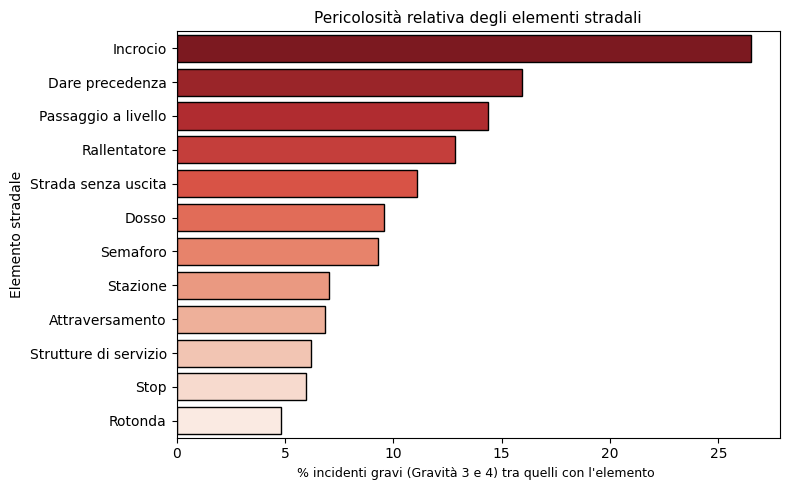

In [10]:
df['Severe'] = df['Severity'] >= 3
severe_rate = {}
for element in bool_cols:
    subset = df[df[element] == True]
    if len(subset) > 0:
        severe_rate[element] = subset['Severe'].mean() * 100
        
severe_rate_series = pd.Series(severe_rate).sort_values(ascending=False)
severe_rate_series.index = severe_rate_series.index.map(road_elem_trad.get)

plt.figure(figsize=(8, 5))
sns.barplot(x=severe_rate_series.values, y=severe_rate_series.index, hue=severe_rate_series.index, palette="Reds_r", edgecolor='black')
plt.xlabel("% incidenti gravi (Gravità 3 e 4) tra quelli con l'elemento ", fontsize=9)
plt.ylabel('Elemento stradale')
plt.title('Pericolosità relativa degli elementi stradali', fontsize=11)
plt.tight_layout()
plt.show()

In [1]:
%%HTML
<h3>Sono presenti altre variabili che influenzano la gravità degli incidenti o che sono influenzate da essa?</h3>
<h4>1) Analisi distribuzione temperatura e gravità</h4>

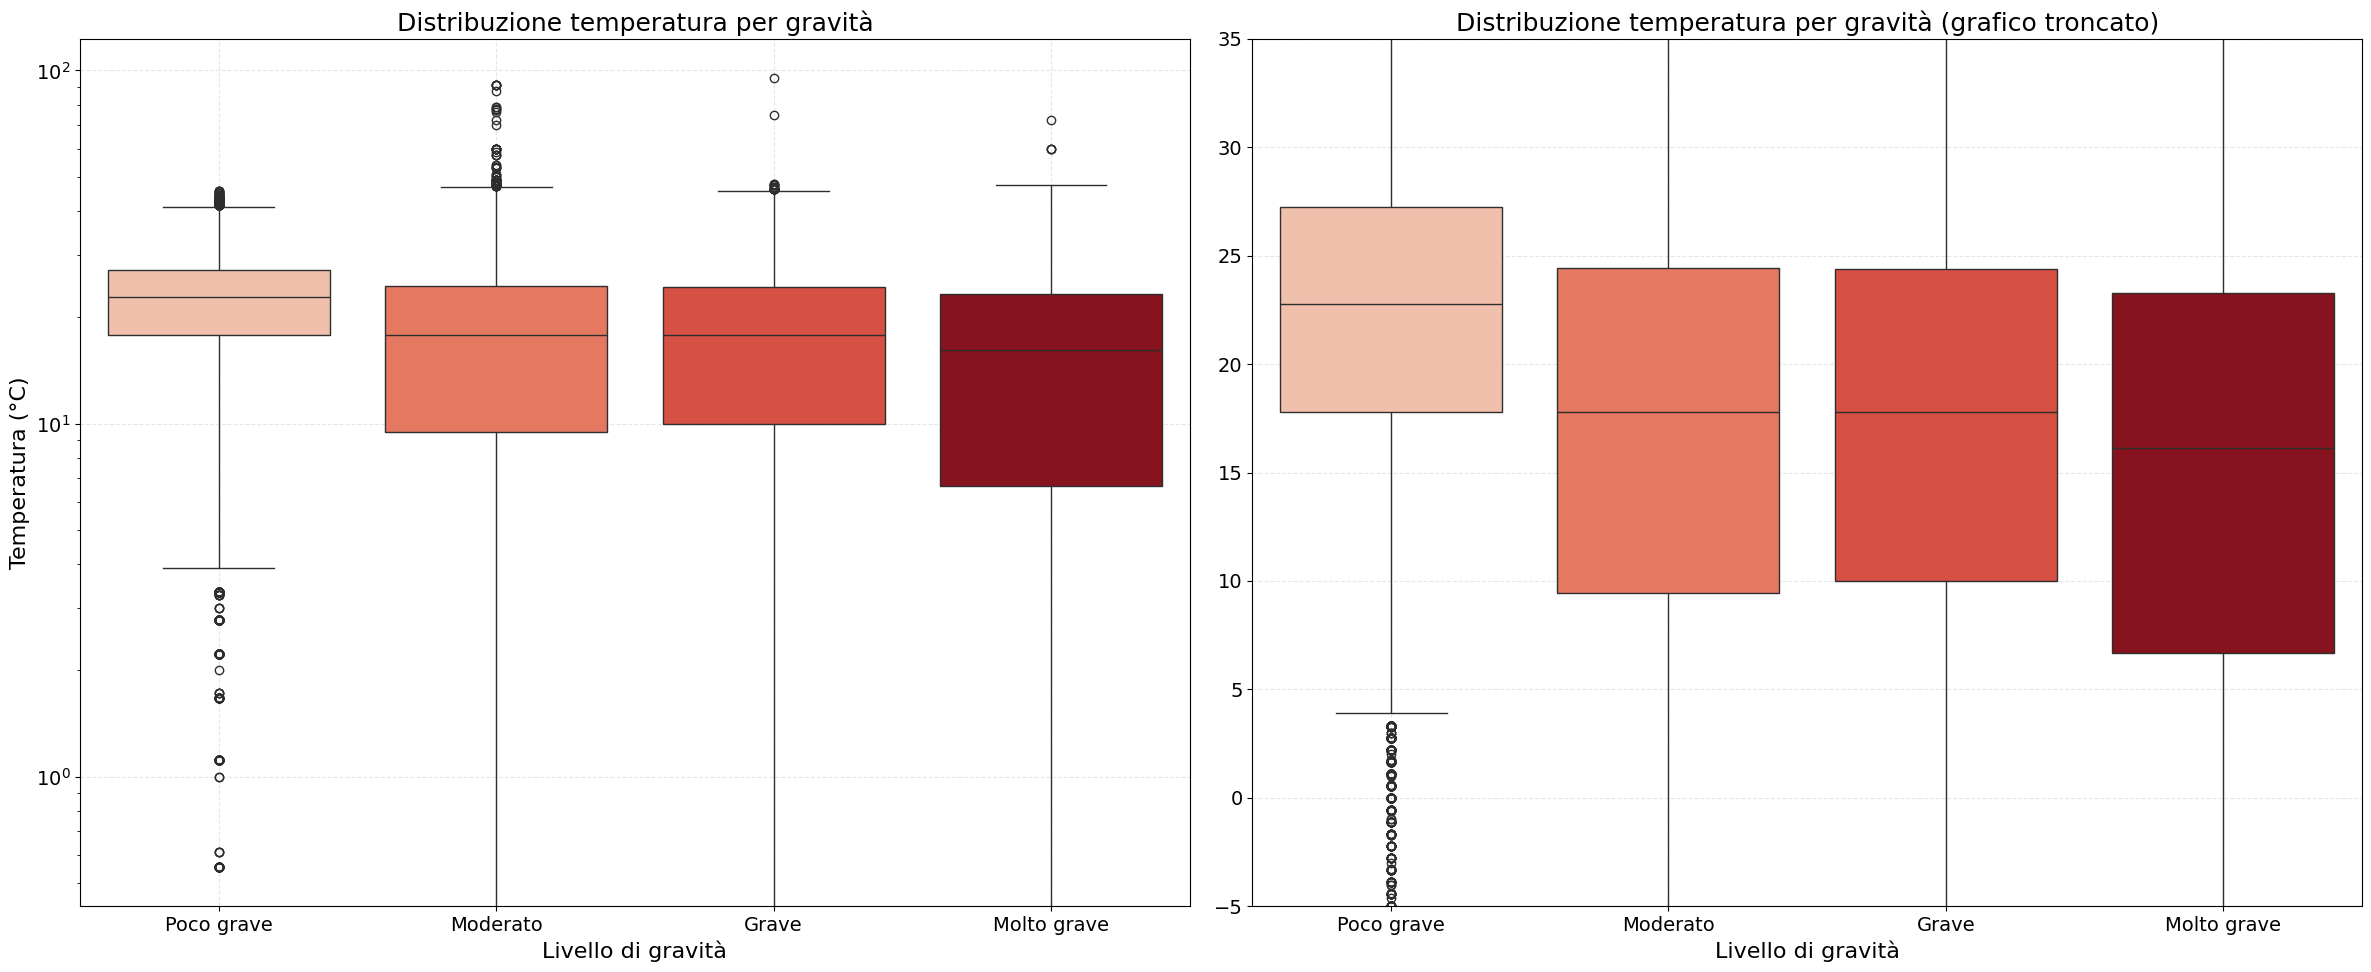

In [16]:
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

df['Severity_label'] = df['Severity'].map(severity_labels)

sns.boxplot(data=df, x='Severity_label', y='Temperature(C)', hue='Severity_label', palette=custom_palette, legend=False, order=severity_order, ax=ax1)
ax1.set_title('Distribuzione temperatura per gravità')
ax1.set_xlabel('Livello di gravità')
ax1.set_ylabel('Temperatura (°C)')
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_yscale('log')

sns.boxplot(data=df, x='Severity_label', y='Temperature(C)', hue='Severity_label', palette=custom_palette, legend=False, order=severity_order, ax=ax2)
ax2.set_title('Distribuzione temperatura per gravità (grafico troncato)')
ax2.set_xlabel('Livello di gravità')
ax2.set_ylabel('')
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.set_ylim(-5, 35)

plt.tight_layout()
plt.show()

In [10]:
%%HTML
<h4>2) Analisi distribuzione durata incidenti e gravità</h4>

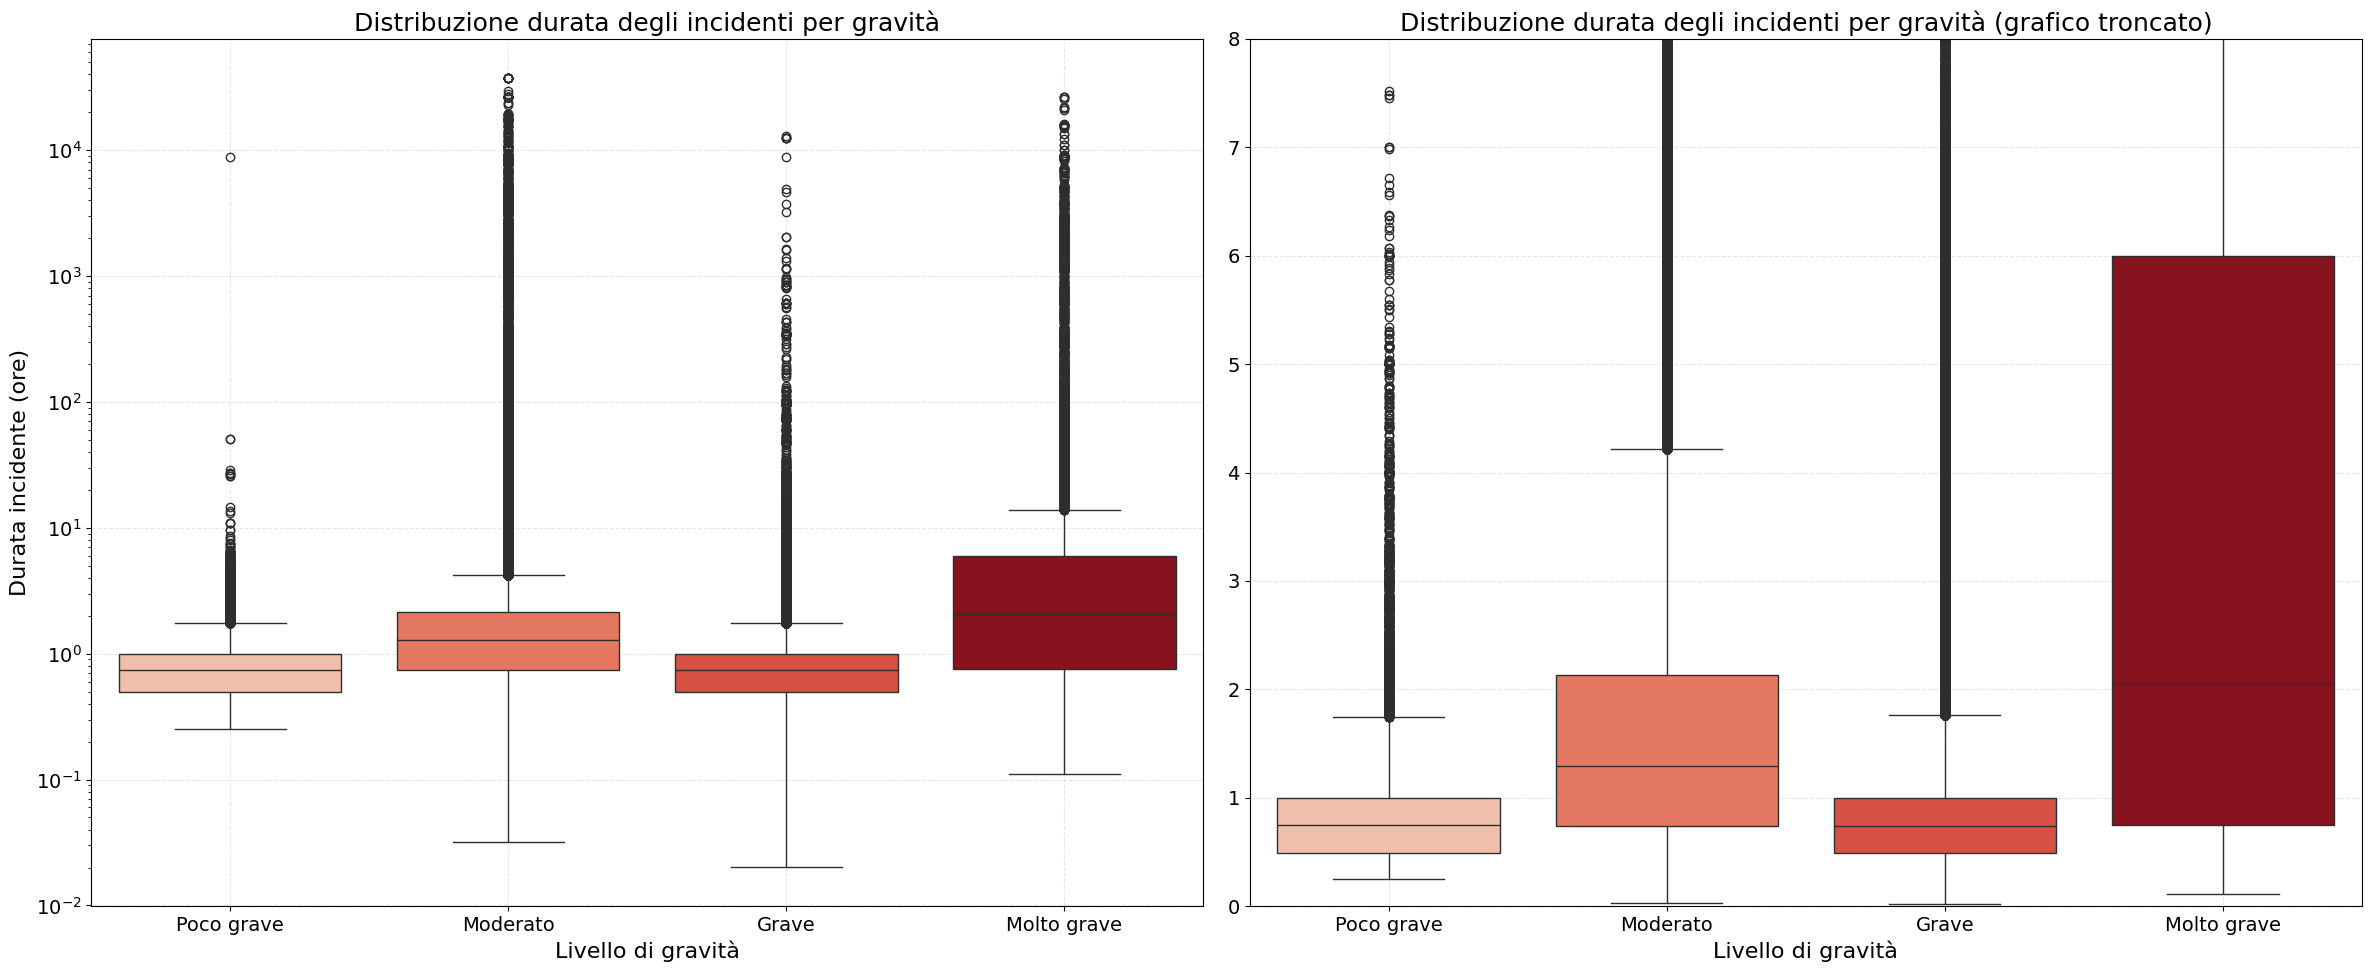

In [15]:
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

sns.boxplot(data=df, x='Severity_label', y='Duration_hr', hue='Severity_label', palette=custom_palette, legend=False, order=severity_order, ax=ax1)
ax1.set_title('Distribuzione durata degli incidenti per gravità')
ax1.set_xlabel('Livello di gravità')
ax1.set_ylabel('Durata incidente (ore)')
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_yscale('log')

sns.boxplot(data=df, x='Severity_label', y='Duration_hr', hue='Severity_label', palette=custom_palette, legend=False, order=severity_order, ax=ax2)
ax2.set_title('Distribuzione durata degli incidenti per gravità (grafico troncato)')
ax2.set_xlabel('Livello di gravità')
ax2.set_ylabel('')
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.set_ylim(0, 8)

plt.tight_layout()
plt.show()

In [11]:
%%HTML
<h4>3) Analisi distribuzione distanza incidenti e gravità</h4>

C:\Users\user\AppData\Local\Temp\ipykernel_3628\82220400.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


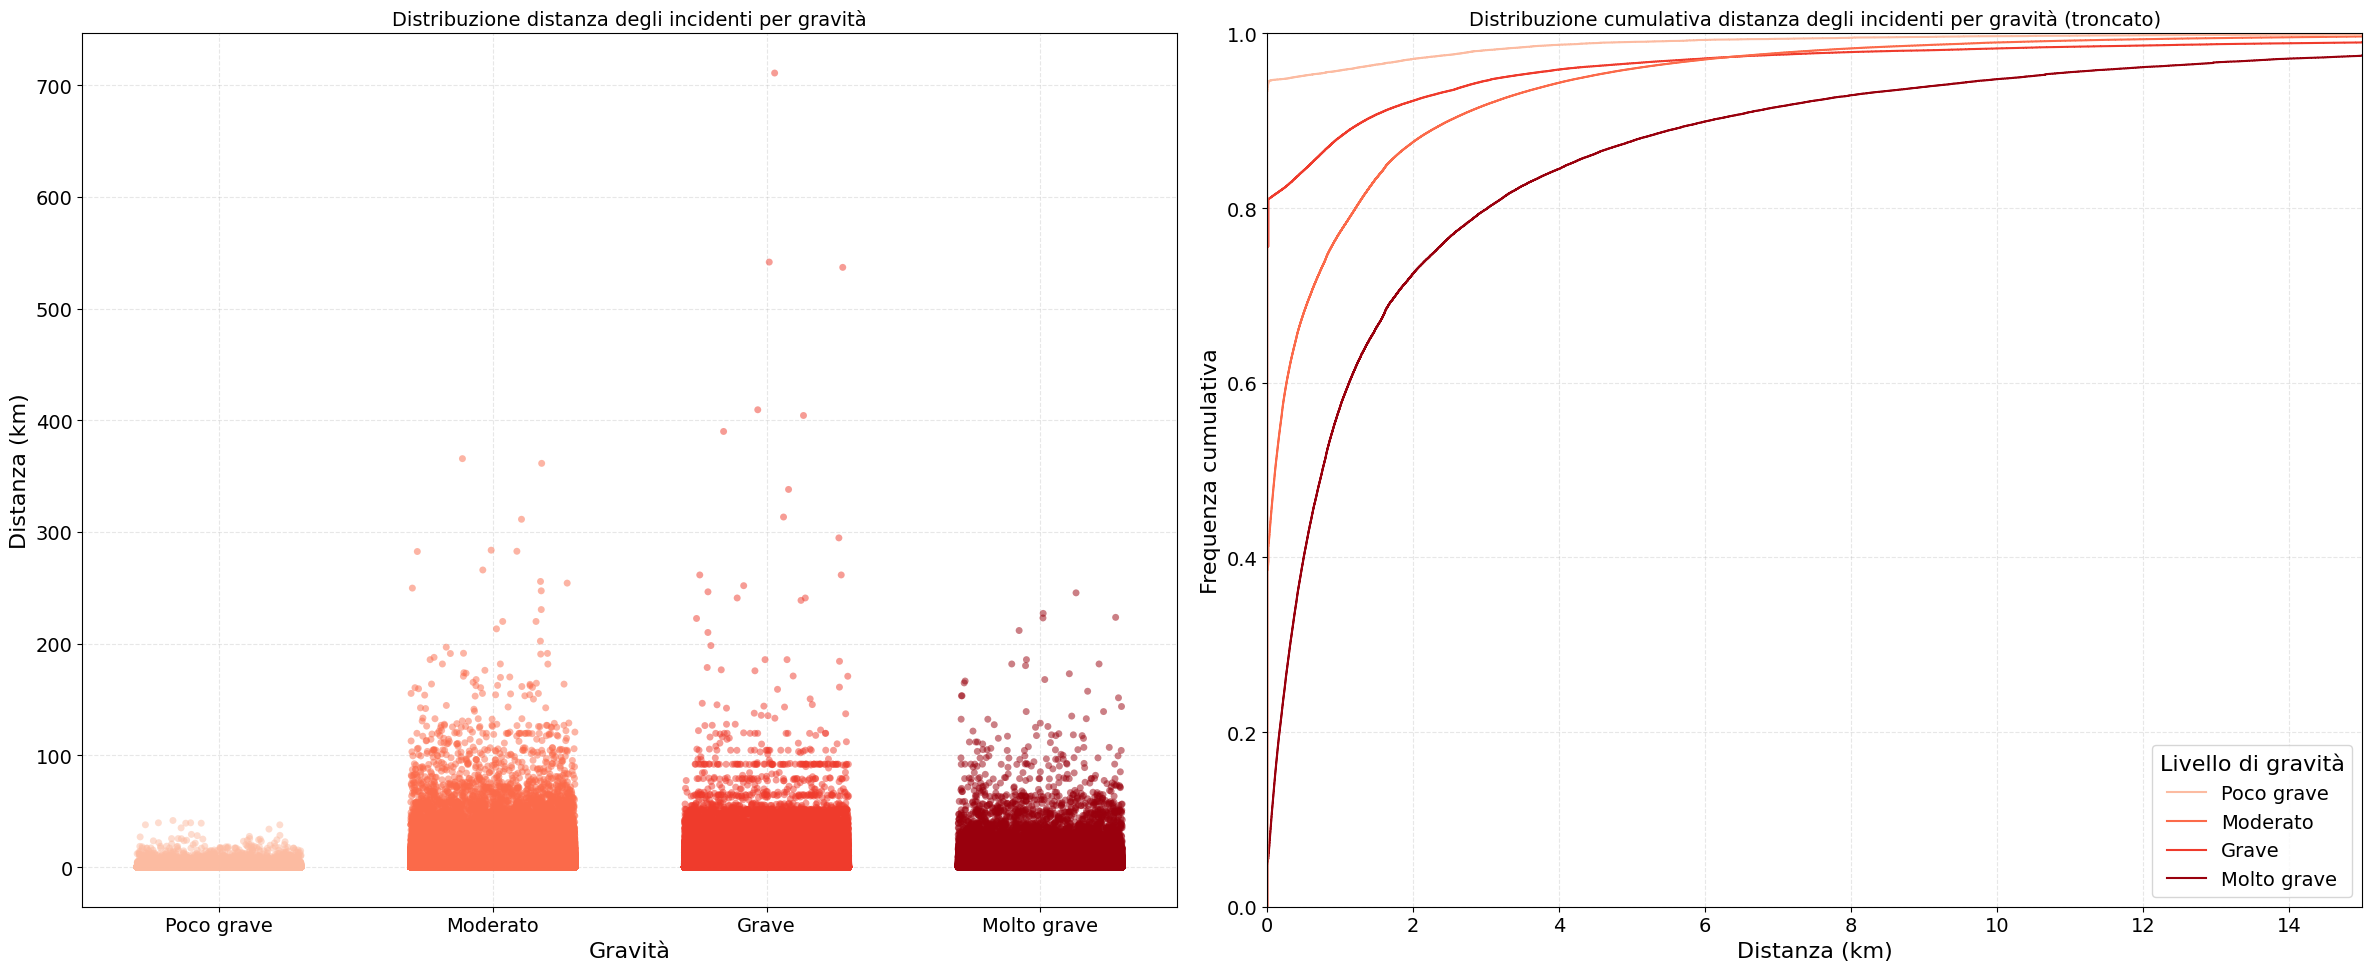

In [14]:
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

sns.stripplot(data=df, x='Severity_label', y='Distance_km', jitter=0.3, hue='Severity_label', palette=custom_palette, legend=False, order=severity_order, alpha=0.5, ax=ax1)
ax1.set_title('Distribuzione distanza degli incidenti per gravità', fontsize=14)
ax1.set_xlabel('Gravità')
ax1.set_ylabel('Distanza (km)')
ax1.grid(True, linestyle='--', alpha=0.3)

df['Livello di gravità'] = pd.Categorical(df['Severity_label'], categories=severity_order, ordered=True)
sns.ecdfplot(data=df, x='Distance_km', hue='Livello di gravità', palette=custom_palette, ax=ax2)
ax2.set_title('Distribuzione cumulativa distanza degli incidenti per gravità (troncato)', fontsize=14)
ax2.set_xlabel('Distanza (km)')
ax2.set_ylabel('Frequenza cumulativa')
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.set_xlim(0, 15)

plt.tight_layout()
plt.show()

In [51]:
%%HTML
<div style="text-align: center;">
  <h1>CONCLUSIONI</h1>
</div><br><br>

<ul style="font-size: 18px; line-height: 3.0;">
  <li><strong>Quando avvengono maggiormente:</strong> più frequenti nella stagione invernale, nelle orari di punta, e nei giorni lavorativi.</li>
  <li><strong>Meteo e gravità:</strong> pioggia, neve, ghiaccio e nebbia aumentano la gravità.</li>
  <li><strong>Elementi stradali e gravità:</strong> l'incrocio è l'elemento più pericoloso.</li>
  <li><strong>Altre variabili e gravità:</strong> durata e distanza sono influenzati dalla gravità, mentre la temperatura influenza la gravità.</li>
</ul>

In [36]:
%%HTML
<div style="text-align:center; font-size: 3em;">
    Grazie per l'attenzione!
</div>